In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Step 1: Define the problem parameters
a, b = 0, 1  # Integral bounds
gamma = 10   # Kernel parameter
num_samples = 20000  # Increased number of samples in the dataset
num_points = 100  # Number of points for x and t

In [3]:
# Step 2: Generate synthetic dataset
def generate_random_polynomial(num_points):
    """
    Generate a random polynomial function of up to third order.
    """
    # Randomly generate coefficients for the polynomial a3*t^3 + a2*t^2 + a1*t + a0
    a3 = np.random.uniform(-1, 1)
    a2 = np.random.uniform(-1, 1)
    a1 = np.random.uniform(-1, 1)
    a0 = np.random.uniform(-1, 1)

    # Generate the polynomial function values over the grid t
    t = np.linspace(a, b, num_points)
    f = a3 * t**3 + a2 * t**2 + a1 * t + a0
    return f

def kernel(x, t, gamma=gamma):
    """Gaussian kernel function."""
    return np.exp(-gamma * (x - t)**2)

# Generate grid points
x = np.linspace(a, b, num_points)
t = np.linspace(a, b, num_points)

# Initialize arrays to hold the dataset
X_train = []  # This will hold the inputs (g(x))
Y_train = []  # This will hold the outputs (f(t))

for _ in range(num_samples):
    # Generate a new random polynomial f(t)
    f_true = generate_random_polynomial(num_points)

    # Compute the integral to generate g(x) for each point in x
    g = np.zeros_like(x)
    for i, xi in enumerate(x):
        g[i] = np.trapz(kernel(xi, t) * f_true, t)

    # Add some noise to simulate real-world data
    noise_level = 0.05
    g_noisy = g + noise_level * np.random.randn(*g.shape)

    # Append the inputs and outputs to the dataset
    X_train.append(g_noisy)
    Y_train.append(f_true)

# Convert lists to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [4]:
# Step 3: Define the neural network model
# Increased number of layers and nodes per layer for better learning
model = Sequential([
    Dense(128, activation='relu', input_shape=(num_points,)),  # Increased nodes
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_points)  # Output size should match the number of points in f(t)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Step 4: Train the model with more epochs for better learning
history = model.fit(X_train, Y_train, epochs=1000, verbose=1)

Epoch 1/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0663
Epoch 2/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0034
Epoch 3/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023
Epoch 4/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0023
Epoch 5/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024
Epoch 6/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0020
Epoch 7/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0020
Epoch 8/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0020
Epoch 9/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 10/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020
Epoch 11/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0021
Epoch 12/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 13/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 14/1000
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020
Epoch 15/1000
625/625 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


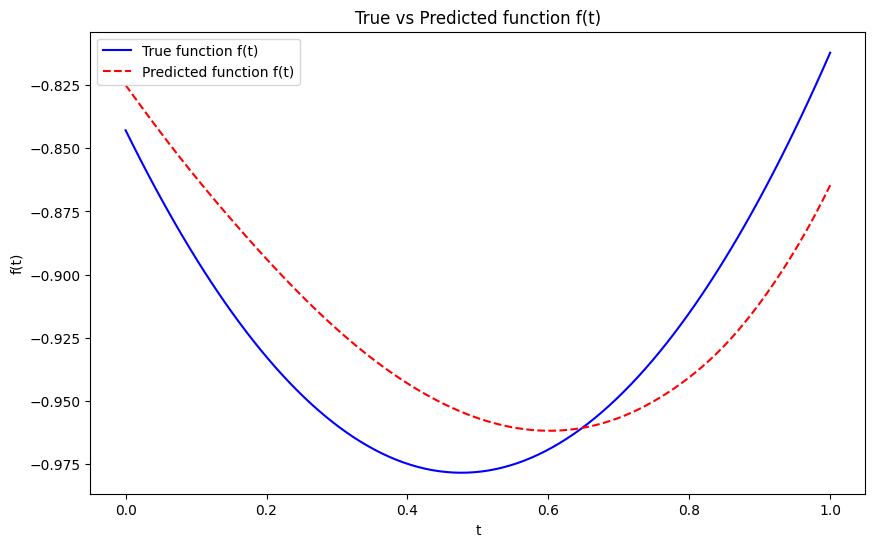

In [6]:
# Step 5: Evaluate the model on a new sample
# Generate a new random polynomial f(t) for testing
f_test = generate_random_polynomial(num_points)

# Compute the integral to generate g(x) for the test function
g_test = np.zeros_like(x)
for i, xi in enumerate(x):
    g_test[i] = np.trapz(kernel(xi, t) * f_test, t)

# Add some noise to simulate real-world data
g_test_noisy = g_test + noise_level * np.random.randn(*g_test.shape)

# Predict using the trained model
f_pred = model.predict(g_test_noisy.reshape(1, -1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, f_test, label='True function f(t)', color='blue')
plt.plot(t, f_pred[0], label='Predicted function f(t)', linestyle='dashed', color='red')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.title('True vs Predicted function f(t)')
plt.show()
